In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [17]:

books_df = pd.read_csv('Books.csv')
ratings_df = pd.read_csv('Ratings.csv')



/tmp/ipykernel_13348/1042444126.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('Books.csv')


In [18]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [19]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [20]:

books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [21]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


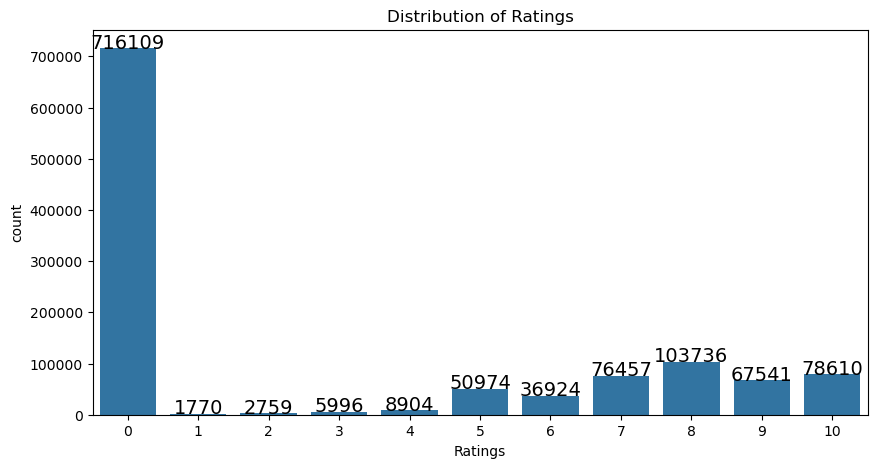

In [23]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=ratings_df, x='Book-Rating')
labels = (ratings_df['Book-Rating'].value_counts().sort_index())
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')

for i,v in enumerate(labels):
    ax.text(i, v+100, str(v), horizontalalignment='center', size=14, color='black')
plt.show()

In [24]:
title_mask = books_df['Book-Title'].isna()
books_df = books_df.loc[title_mask == False]

In [27]:
# Merge on the ISBN column
df = pd.merge(ratings_df, books_df[['ISBN', 'Book-Title']], on='ISBN', how='inner')

# Display the first few rows
df.head()


,User-ID,ISBN,Book-Rating,Book-Title
0,276725,034545104X,0,Flesh Tones: A Novel
1,276726,0155061224,5,Rites of Passage
2,276727,0446520802,0,The Notebook
3,276729,052165615X,3,Help!: Level 1
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...


In [28]:


df = df.drop_duplicates(['User-ID','Book-Title'])



In [33]:
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix

# Step 1: Preprocess ratings to binary (1 if rated, 0 if not)
df['Book-Rating'] = df['Book-Rating'].apply(lambda x: 1 if x > 0 else 0)

# Step 2: Convert categorical columns to codes
user_ids = pd.Categorical(df['User-ID']).codes
book_titles = pd.Categorical(df['Book-Title']).codes

# Step 3: Create a sparse matrix with rows as users and columns as books
# coo_matrix expects three arguments: data, (row, col), shape
sparse_matrix = coo_matrix(
    (df['Book-Rating'], (user_ids, book_titles)),
    shape=(len(np.unique(user_ids)), len(np.unique(book_titles)))
)

# Step 4: Convert to csr format if needed for further processing
sparse_matrix = sparse_matrix.tocsr()

# You now have a sparse matrix representing users and books, with 1s where ratings exist


In [34]:
from scipy.sparse import csr_matrix

# Assuming 'sparse_matrix' is the csr_matrix with 1 for rated books and 0 otherwise
# Convert sparse matrix to a list of transactions
transactions = []

# Iterate through each row in the sparse matrix
for user_row in sparse_matrix:
    # Find the indices (i.e., books) that are rated (value = 1)
    books = user_row.indices  # This returns the indices of non-zero entries (rated books)
    transactions.append(books.tolist())  # Append as a list of books (by index)

# You now have a list of transactions, where each transaction is a list of book indices the user has rated


In [35]:
# Assuming `book_titles` is the list of unique book titles
# Map indices back to book titles
book_titles = pd.Categorical(df['Book-Title']).categories  # Get the actual book titles from the categorical codes
transactions_with_titles = [[book_titles[i] for i in transaction] for transaction in transactions]



In [43]:
import pyfpgrowth

# Assuming transactions_with_titles is the list of transactions

# Step 1: Run frequent pattern growth
patterns = pyfpgrowth.find_frequent_patterns(transactions_with_titles, 100)

# Step 2: Generate association rules
rules = pyfpgrowth.generate_association_rules(patterns, 0.5)

# Function to display rules in a more readable format
def display_rules(rules):
    for rule in rules:
        antecedent = rule
        consequent = rules[rule][0]
        confidence = rules[rule][1]
        print(f"Rule: {antecedent} -> {consequent} (Confidence: {confidence:.2f})")

# Function to filter and display rules related to a specific book
def display_rules_for_book(rules, book_title):
    print(f"\nAssociation rules related to '{book_title}':")
    found = False
    for rule in rules:
        antecedent = rule
        consequent = rules[rule][0]
        confidence = rules[rule][1]
        # Check if the book title is in the antecedent or consequent
        if book_title in antecedent or book_title in consequent:
            found = True
            print(f"Rule: {antecedent} -> {consequent} (Confidence: {confidence:.2f})")
    if not found:
        print(f"No rules found for '{book_title}'.")

# Display all rules
print("All Association Rules:")
display_rules(rules)



All Association Rules:
Rule: ('The Amber Spyglass (His Dark Materials, Book 3)',) -> ('The Subtle Knife (His Dark Materials, Book 2)',) (Confidence: 0.77)
Rule: ('C Is for Corpse (Kinsey Millhone Mysteries (Paperback))',) -> ('B Is for Burglar (Kinsey Millhone Mysteries (Paperback))',) (Confidence: 0.60)
Rule: ('Tribulation Force: The Continuing Drama of Those Left Behind (Left Behind No. 2)',) -> ("Left Behind: A Novel of the Earth's Last Days (Left Behind No. 1)",) (Confidence: 0.59)
Rule: ('Shopaholic Takes Manhattan (Summer Display Opportunity)',) -> ('Confessions of a Shopaholic (Summer Display Opportunity)',) (Confidence: 0.60)
Rule: ('The Fellowship of the Ring (The Lord of the Rings, Part 1)', 'The Return of the King (The Lord of the Rings, Part 3)') -> ('The Two Towers (The Lord of the Rings, Part 2)',) (Confidence: 0.92)
Rule: ('The Fellowship of the Ring (The Lord of the Rings, Part 1)', 'The Two Towers (The Lord of the Rings, Part 2)') -> ('The Return of the King (The Lord 

In [44]:


# Search for rules related to a specific book
specific_book = "Interview with the Vampire"  # Replace this with the book you're searching for
display_rules_for_book(rules, specific_book)




Association rules related to 'Interview with the Vampire':
Rule: ('Interview with the Vampire', 'The Queen of the Damned (Vampire Chronicles (Paperback))') -> ('The Vampire Lestat (Vampire Chronicles, Book II)',) (Confidence: 0.77)
Rule: ('Interview with the Vampire', 'The Vampire Lestat (Vampire Chronicles, Book II)') -> ('The Queen of the Damned (Vampire Chronicles (Paperback))',) (Confidence: 0.63)
Rule: ('The Queen of the Damned (Vampire Chronicles (Paperback))', 'The Vampire Lestat (Vampire Chronicles, Book II)') -> ('Interview with the Vampire',) (Confidence: 0.77)
Rule: ('The Vampire Lestat (Vampire Chronicles, Book II)',) -> ('Interview with the Vampire',) (Confidence: 0.53)
